# Solution curve of Van der Pol's Equation for a range of parameter

- radau method

![Alt text](image.png) ![Alt text](image-1.png)

In [3]:
import scipy
import time
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [12]:
# def VanDerPols(t, y, epsilon):
#     yp = np.ones_like(y)
#     yp[0] = y[1]
#     yp[1] = ((1-y[0]**2)*y[1] - y[0])/epsilon
#     return yp

def VanDerPols(t, y, mu):
    yp = np.ones_like(y)
    yp[0] = y[1]
    yp[1] = mu*(1-y[0]**2)*y[1] - y[0]
    return yp

VanDerPols(0, [0, 1], 3)

array([1, 3])

In [13]:
mu = 3
epsilon = 1/mu**2

In [14]:
equation = scipy.integrate.Radau(lambda t, y: VanDerPols(t, y, mu=mu),
                                 t0 = 0,
                                 y0 = [2, 0],
                                 t_bound = 1,
                                 rtol=0.0001,
                                 atol=1e-07
                                 )

print(equation.n, equation.status)

2 running


In [9]:
count = 0
t_final = []
y1_final = []
y2_final = []
step_size = []

while(True):
  count = count + 1
  t_final.append(equation.t)
  y1_final.append(equation.y[0])
  y2_final.append(equation.y[1])
  step_size.append(equation.step_size)
  if equation.status == 'finished':
    break
  if equation.status == 'failed':
    break
  equation.step()
  

print(f"Integration {equation.status} at step {count} and t={equation.t}")

Integration finished at step 19 and t=1


In [10]:
len(t_final)
len(y1_final)

19

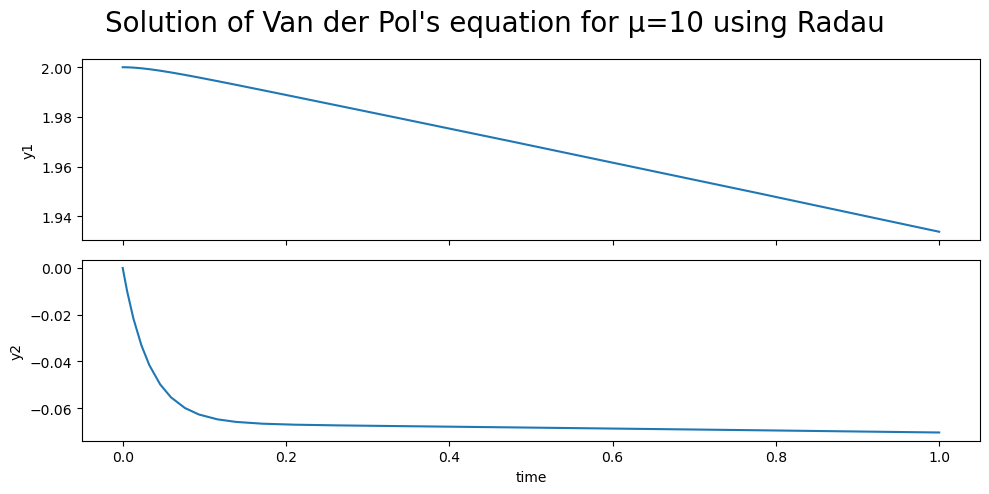

In [11]:
fig, ax = plt.subplots(2, figsize=(10, 5), sharex=True)
ax[0].plot(t_final, y1_final)
ax[1].plot(t_final, y2_final)

ax[0].set_ylabel("y1")
ax[1].set_ylabel("y2")
ax[1].set_xlabel("time")

fig.suptitle(f"Solution of Van der Pol's equation for μ={mu} using Radau", size=20)
fig.tight_layout()
fig.subplots_adjust(top=0.88)

(-2.2157135006708653,
 2.215712986267924,
 -15.589416633241607,
 15.59435574713333)

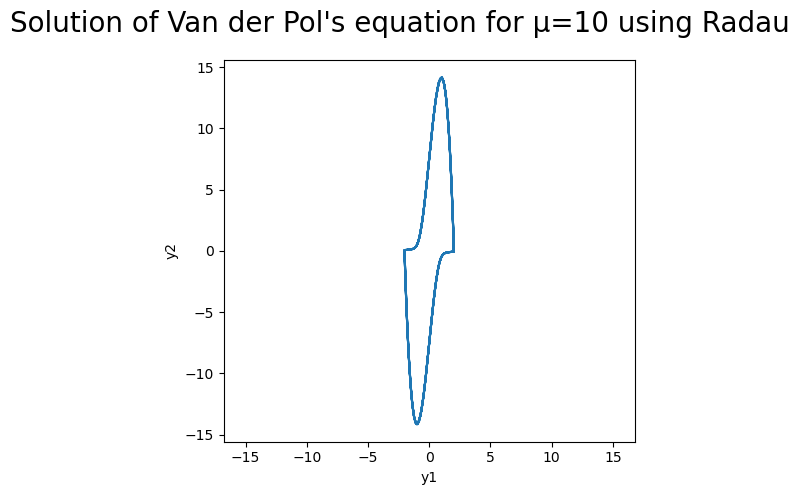

In [382]:
fig, ax = plt.subplots(1, figsize=(5, 5))
ax.plot(y1_final, y2_final)

ax.set_xlabel("y1")
ax.set_ylabel("y2")

fig.suptitle(f"Solution of Van der Pol's equation for μ={mu} using Radau", size=20)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.axis('equal')

100%|██████████| 9/9 [00:02<00:00,  3.31it/s]


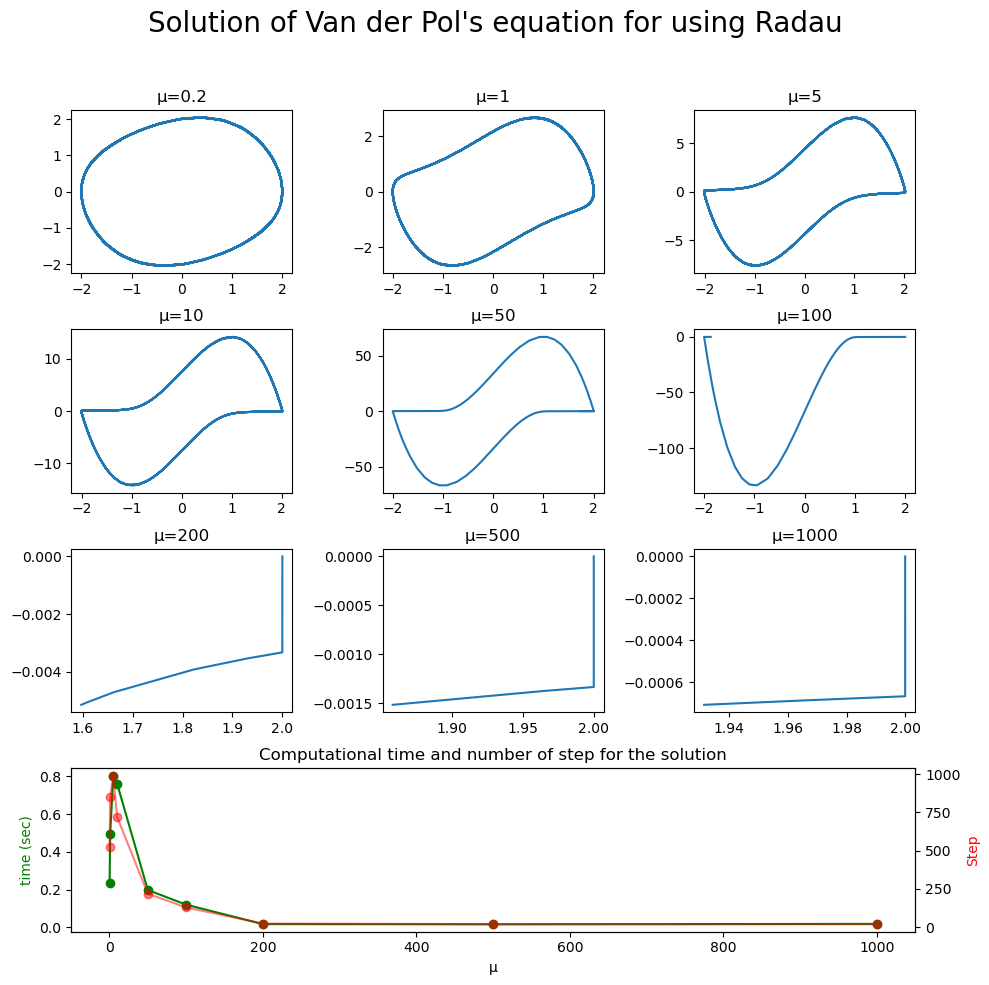

In [488]:
import matplotlib.gridspec as gridspec
mu_list = [0.2, 1, 5, 10, 50, 100, 200, 500, 1000]
fig, ax = plt.subplots(4, 3, figsize=(10, 10))
gs = gridspec.GridSpec(4, 3, width_ratios=[1, 1, 3])
ax_all = plt.subplot(gs[3, :])

computational_time = []
nb_step = []
for i, mu in tqdm(enumerate(mu_list), total=len(mu_list)):
    
    equation = scipy.integrate.Radau(lambda t, y: VanDerPols(t, y, mu=mu),
                                 t0 = 0,
                                 y0 = [2, 0],
                                 t_bound = 100,
                                 rtol=0.0001,
                                 atol=1e-07
                                 )
    
    t_final = []
    y1_final = []
    y2_final = []
    start = time.time()
    while(True):
        t_final.append(equation.t)
        y1_final.append(equation.y[0])
        y2_final.append(equation.y[1])
        if equation.status == 'finished':
            break
        if equation.status == 'failed':
            break
        equation.step()
    end = time.time()
    computational_time.append(end-start)
    nb_step.append(len(t_final))

    ax[i//3, i%3].plot(y1_final, y2_final)
    ax[i//3, i%3].set_title(f"μ={mu}")

ax_all.plot(mu_list, computational_time, 'g-o')
ax_all.set_xlabel("μ")
ax_all.set_ylabel("time (sec)", color = "g")
ax_all.set_title("Computational time and number of step for the solution")

secax_y = ax_all.twinx()
secax_y.plot(mu_list, nb_step, 'r-o', alpha=0.5)
secax_y.set_xlabel("μ")
secax_y.set_ylabel("Step", color = "r")

fig.suptitle(f"Solution of Van der Pol's equation for using Radau", size=20)
fig.tight_layout()
fig.subplots_adjust(top=0.88)

100%|██████████| 9/9 [02:46<00:00, 18.45s/it]


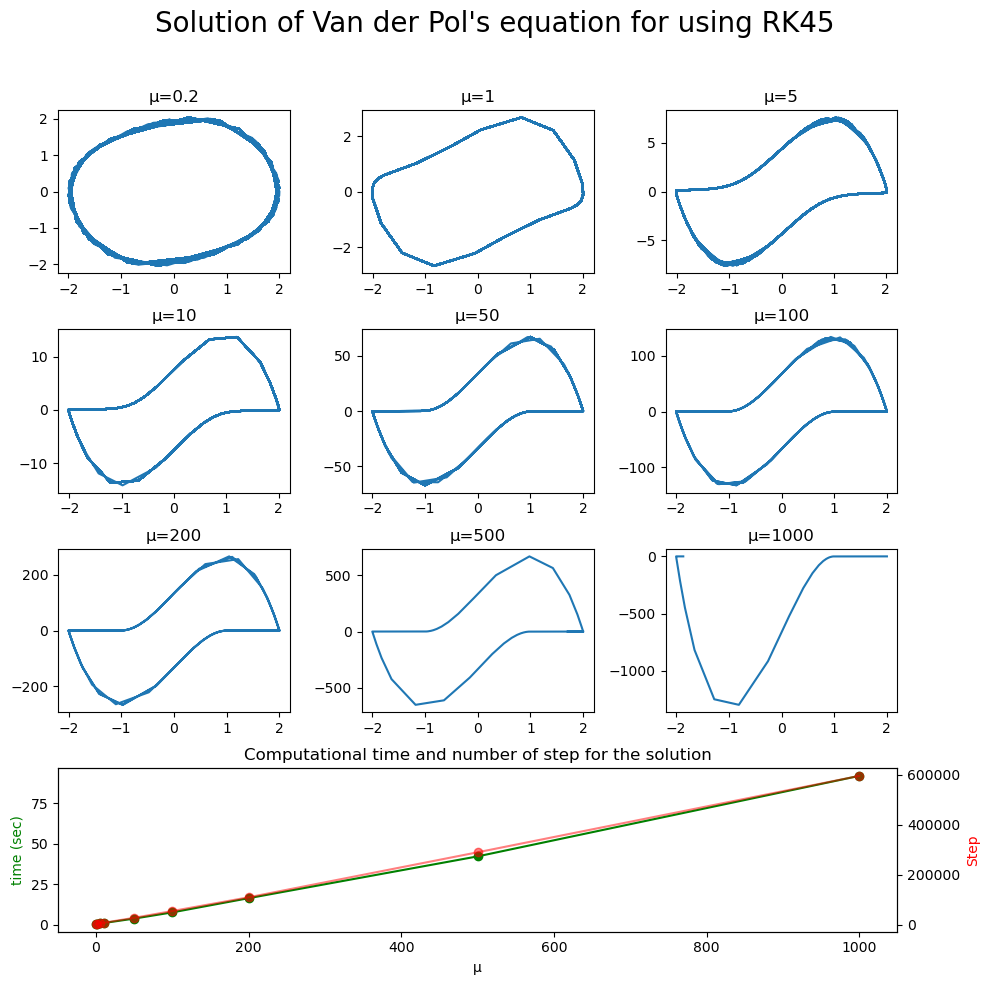

In [465]:
import matplotlib.gridspec as gridspec
mu_list = [0.2, 1, 5, 10, 50, 100, 200, 500, 1000]
fig, ax = plt.subplots(4, 3, figsize=(10, 10))
gs = gridspec.GridSpec(4, 3, width_ratios=[1, 1, 3])
ax_all = plt.subplot(gs[3, :])

computational_time = []
nb_step = []
for i, mu in tqdm(enumerate(mu_list), total=len(mu_list)):
    
    equation = scipy.integrate.RK45(lambda t, y: VanDerPols(t, y, mu=mu),
                                 t0 = 0,
                                 y0 = [2, 0],
                                 t_bound = 1000,
                                 rtol=0.0001,
                                 atol=1e-07
                                 )
    
    t_final = []
    y1_final = []
    y2_final = []
    start = time.time()
    while(True):
        t_final.append(equation.t)
        y1_final.append(equation.y[0])
        y2_final.append(equation.y[1])
        if equation.status == 'finished':
            break
        if equation.status == 'failed':
            break
        equation.step()
    end = time.time()
    computational_time.append(end-start)
    nb_step.append(len(t_final))

    ax[i//3, i%3].plot(y1_final, y2_final)
    ax[i//3, i%3].set_title(f"μ={mu}")

ax_all.plot(mu_list, computational_time, 'g-o')
ax_all.set_xlabel("μ")
ax_all.set_ylabel("time (sec)", color = "g")
ax_all.set_title("Computational time and number of step for the solution")

secax_y = ax_all.twinx()
secax_y.plot(mu_list, nb_step, 'r-o', alpha=0.5)
secax_y.set_xlabel("μ")
secax_y.set_ylabel("Step", color = "r")

fig.suptitle(f"Solution of Van der Pol's equation for using RK45", size=20)
fig.tight_layout()
fig.subplots_adjust(top=0.88)

In [499]:
equation = scipy.integrate.RK45(lambda t, y: VanDerPols(t, y, mu=500),
                                t0 = 0,
                                y0 = [2, 0],
                                t_bound = 100,
                                rtol=0.0001,
                                atol=1e-07
                                )

t_final = []
y1_final = []
y2_final = []
while(True):
    t_final.append(equation.t)
    y1_final.append(equation.y[0])
    y2_final.append(equation.y[1])
    if equation.status == 'finished':
        break
    if equation.status == 'failed':
        break
    equation.step()

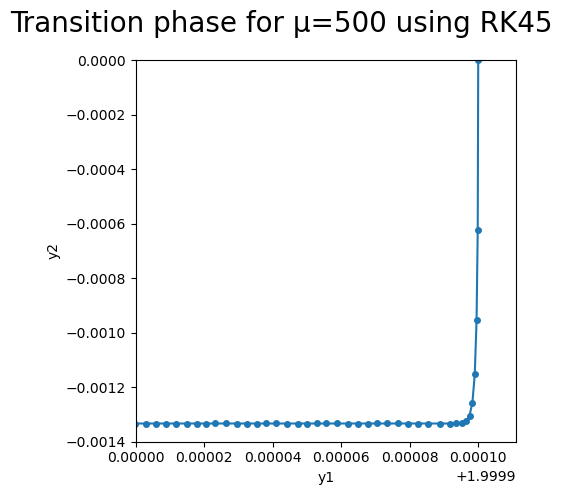

In [500]:
fig, ax = plt.subplots(1, figsize=(5, 5))
ax.plot(y1_final, y2_final, "-o", markersize=4)

ax.set_xlabel("y1")
ax.set_ylabel("y2")
ax.set_xlim([1.9999, 2.00001111])
ax.set_ylim([-0.0014, 0])

fig.suptitle(f"Transition phase for μ={500} using RK45", size=20)
fig.tight_layout()
fig.subplots_adjust(top=0.88)